In [10]:
!pip install plotly

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=b081c9c422b66cbaafd14b87cf884eb817072f593fe7c212fb5dc8155add1abe
  Stored in directory: c:\users\home\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [41]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [12]:
# Cargar datos
path = 'archivos/reviews_vidjew_es.csv'
data = pd.read_csv(path)
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


In [51]:
data.product_category.value_counts(normalize=True)

jewelry        0.502
video_games    0.498
Name: product_category, dtype: float64

In [46]:
#Conjunto de entrenamiento y prueba
train, test = train_test_split(data, test_size=0.2, random_state=42)

print(f"El cojunto de datos de entrenamiento tiene {train.shape[0]} registros")
print(f"El cojunto de datos de prueba tiene {test.shape[0]} registros")

El cojunto de datos de entrenamiento tiene 800 registros
El cojunto de datos de prueba tiene 200 registros


In [30]:
stopwords_sp = stopwords.words('spanish')

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = " ".join([palabra for palabra in texto.split() if palabra not in stopwords_sp])
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [52]:
X_train = tfidf_vect.fit_transform(train.review_body.values)
y_train = train.product_category.values

X_test = tfidf_vect.transform(test.review_body.values)
y_test = test.product_category.values


In [53]:
nb = MultinomialNB()
logreg = LogisticRegression(class_weight="balanced")
svm = LinearSVC(class_weight='balanced')

In [54]:
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train);

In [55]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [56]:
print(f"Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}")
print(f"Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}")
print(f"SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}")

Naive Bayes:            0.86
Regresión Logística:    0.86
SVM:                    0.84


In [60]:
metricas = [precision_score, recall_score, f1_score]

for metrica in metricas:
    print(metrica.__name__)
    print(f"Naive Bayes: {metrica(y_test, y_pred_nb, pos_label='jewelry'):>15.2f}")
    print(f"Regresión Logística: {metrica(y_test, y_pred_logreg, pos_label='jewelry'):>7.2f}")
    print(f"SVM: {metrica(y_test, y_pred_svm, pos_label='jewelry'):>23.2f}")
    print()

precision_score
Naive Bayes:            0.81
Regresión Logística:    0.86
SVM:                    0.82

recall_score
Naive Bayes:            0.95
Regresión Logística:    0.86
SVM:                    0.86

f1_score
Naive Bayes:            0.87
Regresión Logística:    0.86
SVM:                    0.84



In [64]:
print("Naive Bayes")
print(classification_report(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(classification_report(y_test, y_pred_logreg))
print()
print("SVM")
print(classification_report(y_test, y_pred_svm))

Naive Bayes
              precision    recall  f1-score   support

     jewelry       0.81      0.95      0.87        97
 video_games       0.94      0.79      0.86       103

    accuracy                           0.86       200
   macro avg       0.87      0.87      0.86       200
weighted avg       0.88      0.86      0.86       200


Regresión Logística
              precision    recall  f1-score   support

     jewelry       0.86      0.86      0.86        97
 video_games       0.86      0.86      0.86       103

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200


SVM
              precision    recall  f1-score   support

     jewelry       0.82      0.86      0.84        97
 video_games       0.86      0.83      0.84       103

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84   

In [62]:
print(confusion_matrix(y_test, y_pred_nb))
print()
print("Regresión Logística")
print(confusion_matrix(y_test, y_pred_logreg))
print()
print("SVM")
print(confusion_matrix(y_test, y_pred_svm))

[[92  5]
 [22 81]]

Regresión Logística
[[83 14]
 [14 89]]

SVM
[[83 14]
 [18 85]]


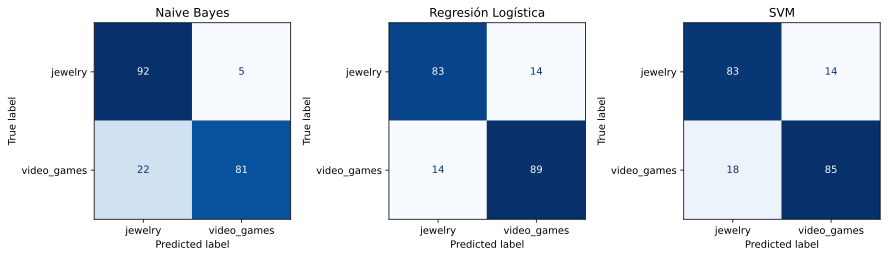

In [63]:
%config InlineBackend.figure_format = 'svg'

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(1,3,1)
plot_confusion_matrix(nb, X_test, y_test, cmap = 'Blues', ax=ax1).im_.colorbar.remove()
plt.title("Naive Bayes")

ax2 = fig.add_subplot(1,3,2)
plot_confusion_matrix(logreg, X_test, y_test, cmap = 'Blues', ax=ax2).im_.colorbar.remove()
plt.title("Regresión Logística")

ax3 = fig.add_subplot(1,3,3)
plot_confusion_matrix(svm, X_test, y_test, cmap = 'Blues', ax=ax3).im_.colorbar.remove() # normalize='true'
plt.title("SVM");

In [ ]:
##PARTE 2

In [66]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns=tfidf_vect.get_feature_names())

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


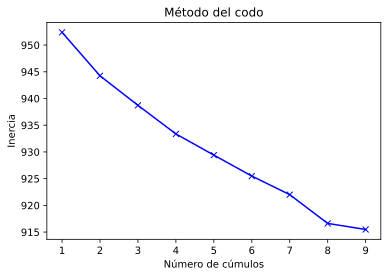

In [67]:
ks = []
kinertia = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    ks.append(k)
    kinertia.append(kmeans.inertia_)
    
plt.xlabel("Número de cúmulos"); 
plt.ylabel("Inercia");
plt.title('Método del codo')
plt.plot(ks,kinertia, 'bx-');

In [97]:
k_pt = 8
model = KMeans(n_clusters=k_pt)
model.fit(tfidf_matrix)
nbrs = NearestNeighbors(n_neighbors=3, metric='euclidean').fit(tfidf_matrix.values)

In [98]:
data['cluster'] = model.labels_
clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

In [99]:
print(f"CLUSTERS:\n")
centroids = model.cluster_centers_
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_vect.get_feature_names()

for i in range(k_pt):
    print(f"Cluster {i}")
    print(f"COUNT{clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print(f"TERMS ", end=" ")
    for ind in order_centroids[i, :20]:
        print(f'{terms[ind]}', end=" "),
    print(f"\n REPRESENTATIVE COMMENTS")
    for comment in data.iloc[nbrs.kneighbors([centroids[i]])[1][0]]['review_body'].values:
        print(f"* {comment}")
    print("\n")

CLUSTERS:

Cluster 0
COUNT81 comments (8.10% of the data)
TERMS  para regalo le un mi fue hijo ha de encantado lo no la es juego muy el en jugar que 
 REPRESENTATIVE COMMENTS
* Fue para un regalo, le ha encantado y llegó de un día para otro.
* Fue para un regalo y le encantó
* Bonito fue para un regalo y bien


Cluster 1
COUNT185 comments (18.50% of the data)
TERMS  que es la de el lo no se en más un pero para por con bien una muy precio foto 
 REPRESENTATIVE COMMENTS
* Es bonito, pero no traía la bolsa de la marca, con lo que por el precio que he pagado igual que en la web de Tous, desmejora mucho el regalo, y parece que es de pega.
* La pulsera es de muy buena calidad, la verdad es que era algo reacio a adquirir este tipo de regalos a través de Amazon, pero está pulsera me ha demostrado lo equivocado que estaba... Al ser de acero inoxidable está brillante como el primer día, a mi novia aun no se le ha puesto negra ni nada extraño y eso que no se la quita para nada, la lleva puesta 24

In [100]:
clusters = {0:'Cluster1',
            1:'Cluster2',
            2:'Cluster3',
            3:'Cluster4',
            4:'Cluster5',
            5:'Cluster6',
            6:'Cluster7',
            7:'Cluster'}

data['cluster'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(2)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster
856,es_0901244,product_es_0041052,reviewer_es_0461539,5,"Se trata de un videojuego, por lo que es muy s...",Sin más...,es,video_games,Cluster3
486,es_0716494,product_es_0857881,reviewer_es_0135253,4,Sigue la línea de los anteriores,Bueno,es,video_games,Cluster6


In [101]:
df_centroides = pd.DataFrame(model.cluster_centers_)
df_centroides['cluster'] = clusters.values()
df_centroides


,0,1,2,3,4,5,6,7,8,9,...,3820,3821,3822,3823,3824,3825,3826,3827,3828,cluster
0,-1.084202e-19,4.265233e-03,0.000000e+00,-4.065758e-20,5.421011e-20,0.000000e+00,2.168404e-19,2.710505e-20,-5.421011e-20,2.881486e-03,...,0.000000e+00,-4.065758e-20,2.710505e-20,1.084202e-19,-1.084202e-19,2.168404e-19,1.084202e-19,8.673617e-19,4.336809e-19,Cluster1
1,1.008793e-03,6.505213e-19,2.710505e-19,6.359663e-04,1.116879e-03,9.018948e-04,-6.505213e-19,-1.084202e-19,1.084202e-19,4.336809e-19,...,2.168404e-19,6.359663e-04,7.406863e-04,1.626303e-19,-2.168404e-19,3.221358e-03,1.363419e-03,3.630945e-03,6.505213e-19,Cluster2
2,-4.336809e-19,1.815954e-03,1.237946e-03,-1.355253e-19,1.084202e-19,-3.252607e-19,6.033661e-04,-1.355253e-19,2.168404e-19,5.421011e-19,...,3.559312e-03,-1.355253e-19,5.421011e-20,2.168404e-19,1.390964e-03,-3.252607e-19,1.626303e-19,1.812561e-03,6.505213e-19,Cluster3
3,-1.084202e-19,7.076680e-03,0.000000e+00,-4.065758e-20,5.421011e-20,0.000000e+00,1.084202e-19,5.421011e-20,-5.421011e-20,2.168404e-19,...,0.000000e+00,-4.065758e-20,2.710505e-20,1.084202e-19,-1.084202e-19,0.000000e+00,1.084202e-19,4.336809e-19,8.083629e-03,Cluster4
4,-2.168404e-19,-2.168404e-19,0.000000e+00,1.355253e-20,3.201676e-03,0.000000e+00,2.168404e-19,2.710505e-20,-5.421011e-20,-1.084202e-19,...,-1.084202e-19,1.355253e-20,2.710505e-20,-5.421011e-20,5.421011e-20,3.534610e-03,5.421011e-20,4.336809e-19,4.336809e-19,Cluster5
5,1.274190e-03,8.673617e-19,1.626303e-19,-1.084202e-19,1.084202e-19,1.938061e-03,-4.336809e-19,8.652868e-04,2.168404e-19,1.907740e-03,...,-1.084202e-19,-1.084202e-19,5.421011e-20,2.168404e-19,-1.626303e-19,8.973483e-04,1.084202e-19,3.147439e-03,1.794009e-03,Cluster6
6,0.000000e+00,6.505213e-19,1.626303e-19,-1.355253e-19,1.084202e-19,1.557603e-03,3.312282e-03,-5.421011e-20,2.161792e-03,4.336809e-19,...,-2.168404e-19,-1.355253e-19,5.421011e-20,1.626303e-19,-1.626303e-19,2.168404e-19,1.084202e-19,2.786435e-03,2.201230e-03,Cluster7
7,5.590242e-03,2.168404e-19,5.421011e-20,-5.421011e-20,5.421011e-20,0.000000e+00,-1.084202e-19,0.000000e+00,0.000000e+00,1.084202e-19,...,-1.084202e-19,-5.421011e-20,2.710505e-20,3.798162e-03,-5.421011e-20,3.252607e-19,0.000000e+00,4.336809e-19,4.336809e-19,Cluster


In [102]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.cluster.values
result['review_body'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'Cluster1': 'blue', 
             'Cluster2': 'yellow',
             'Cluster3': 'green',
             'Cluster4': 'red'}
  

cols = data['cluster'].map(colorsIdx)

trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['review_body'].values,
                   mode='markers',
                   marker=dict(color=cols)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

In [83]:
test = ["Necesitas el juego inicial para eso", "Preciosos estos aretes, buena calidad"]
nuevo_test = tfidf_vect.transform(test)
model.predict(nuevo_test)

array([1, 7])

In [ ]:
##¿A cuál modelo le fue mejor?
## El modelo que mejor dio resultados fue el modelo de regresión logistica, segun los indicadores obtenidos y la matriz de confusión

##¿Cuál modelo se demoró más en entrenar?
##Percibi que el tiempo de los modelos fue el mismo

##Según los resultados del  𝐾 -Means, ¿cuál es la estructura latente de los datos?
## según el Kmeans se dividen en 8 clusters, aunque resulta un poco dificil identificar cada uno de ellos, y al realizar el grafico se PCA se puede notar que los clusters estan mezclados entre si, por lo tanto se deberia realizar un ajuste al modelo
